In [11]:

import jax.numpy as jnp

import sys
sys.path.insert(1,'../scripts/')


import utils
import loader
import tqdm
%load_ext autoreload
%autoreload 2
import imp
imp.reload(loader)
import setup
import scipy.stats as sts
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns 
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_corr_time(train_data_folds,test_data_folds,n_folds=100,w=10):

    all_corrs = np.zeros((n_folds,len(_ys[0])-w))*np.nan


    for fold in tqdm.trange(n_folds):
        
        train_fold, test_fold = train_data_folds[fold],test_data_folds[fold]
        ys_time,_ = zip(*train_fold)
        _,cs_time = zip(*test_fold)

        # fitler out sessions with too few neurons or trials
        min_neurons = 100
        min_trials = 20

        valid = [i for i in range(len(ys_time)) if np.array(_ys[i]).shape[-1] >= min_neurons and np.array(_ys[i]).shape[1] >= min_trials]
        ys_time = [ys_time[i] for i in valid]
        cs = [cs_time[i] for i in valid]

        S = len(ys_time)


        for t in range(len(ys_time[0])-w):

            # get best min_neurons and current time point +window
            all_sessions = []
            for session in range(S):
                ys_sess = ys_time[session][t:t+w,:].reshape(-1,ys_time[session].shape[-1])
                ys_sess = ys_sess[:,np.argsort(ys_sess.std(0))][:,:min_neurons]
                all_sessions.append(ys_sess)

            try:
                dist_neural = utils.dsd([
                    [all_sessions[i],all_sessions[j]]
                    for i in range(S) 
                    for j in range(S)]
                ).reshape(S,S)


                dist_cc = np.zeros((S,S))
                for i in range(S):
                    for j in range(S):
                        dist_cc[i,j] = np.mean(np.abs(cs[i]- cs[j]))

                corr = sts.pearsonr(dist_neural[~jnp.eye(dist_neural.shape[0],dtype=bool)],
                        dist_cc[~jnp.eye(dist_cc.shape[0],dtype=bool)])[0]
                
            except Exception as e:

                print(t,fold,"linalg error/nan")
                continue
            
            all_corrs[fold,t]=corr

    return all_corrs




In [3]:
# load data 

with(open("25_avg_folds_stim_aligned.pkl","rb")) as f:
    import pickle
    params,_ys,train_data_folds,test_data_folds = pickle.load(f)

all_corrs_stim = get_corr_time(train_data_folds,test_data_folds,n_folds=25)


    

  0%|          | 0/25 [00:00<?, ?it/s]2024-07-30 12:41:34,451	INFO worker.py:1788 -- Started a local Ray instance.


20 0 linalg error/nan
109 0 linalg error/nan
124 0 linalg error/nan
128 0 linalg error/nan


  4%|▍         | 1/25 [03:16<1:18:32, 196.35s/it]

22 1 linalg error/nan
99 1 linalg error/nan
120 1 linalg error/nan
130 1 linalg error/nan


  8%|▊         | 2/25 [06:25<1:13:41, 192.24s/it]

58 2 linalg error/nan
101 2 linalg error/nan


 12%|█▏        | 3/25 [09:31<1:09:25, 189.35s/it]

0 3 linalg error/nan
70 3 linalg error/nan
83 3 linalg error/nan


2024-07-30 12:52:54,007	ERROR worker.py:409 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_deterministic_metrics_pair() (pid=15850, ip=127.0.0.1)
  File "/Users/jbarbosa/Dropbox/Neuro/papers/shapemetrics_journalpaper/ibl_analyses/notebooks/../utils.py", line 43, in _deterministic_metrics_pair
    metric.fit(Xi,Xj)
  File "/Users/jbarbosa/Dropbox/Neuro/netrep/netrep/metrics/linear.py", line 109, in fit
    return self.finalize_fit(
           ^^^^^^^^^^^^^^^^^^
  File "/Users/jbarbosa/Dropbox/Neuro/netrep/netrep/metrics/linear.py", line 91, in finalize_fit
    U, _, Vt = np.linalg.svd(Xw.T @ Yw)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "<__array_function__ internals>", line 180, in svd
  File "/Users/jbarbosa/anaconda3/envs/netrep/lib/python3.11/site-packages/numpy/linalg/linalg.py", line 1657, in svd
    u, s, vh = gufunc(a, signature=signature, extobj=extobj)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jbarbosa/anaconda3

88 3 linalg error/nan


 16%|█▌        | 4/25 [12:40<1:06:08, 188.97s/it]

64 4 linalg error/nan
68 4 linalg error/nan
83 4 linalg error/nan
119 4 linalg error/nan


 20%|██        | 5/25 [15:51<1:03:15, 189.78s/it]

26 5 linalg error/nan
46 5 linalg error/nan
66 5 linalg error/nan
102 5 linalg error/nan
135 5 linalg error/nan


 24%|██▍       | 6/25 [18:49<58:48, 185.70s/it]  

60 6 linalg error/nan
95 6 linalg error/nan


 28%|██▊       | 7/25 [21:47<55:01, 183.42s/it]

32 7 linalg error/nan
55 7 linalg error/nan
93 7 linalg error/nan
94 7 linalg error/nan
138 7 linalg error/nan


 32%|███▏      | 8/25 [25:17<54:21, 191.88s/it]

28 8 linalg error/nan
46 8 linalg error/nan
55 8 linalg error/nan
84 8 linalg error/nan


 36%|███▌      | 9/25 [28:21<50:31, 189.48s/it]

57 9 linalg error/nan
83 9 linalg error/nan
96 9 linalg error/nan


 40%|████      | 10/25 [31:36<47:47, 191.15s/it]

20 10 linalg error/nan
63 10 linalg error/nan
78 10 linalg error/nan


 44%|████▍     | 11/25 [34:32<43:29, 186.42s/it]

62 11 linalg error/nan
76 11 linalg error/nan


 48%|████▊     | 12/25 [37:39<40:25, 186.54s/it]

39 12 linalg error/nan


 52%|█████▏    | 13/25 [40:32<36:28, 182.39s/it]

45 13 linalg error/nan
86 13 linalg error/nan
124 13 linalg error/nan


 56%|█████▌    | 14/25 [43:03<31:42, 172.95s/it]

29 14 linalg error/nan
137 14 linalg error/nan


 60%|██████    | 15/25 [45:50<28:31, 171.13s/it]

30 15 linalg error/nan


 64%|██████▍   | 16/25 [48:20<24:43, 164.85s/it]

23 16 linalg error/nan
79 16 linalg error/nan
103 16 linalg error/nan


 68%|██████▊   | 17/25 [50:53<21:29, 161.19s/it]

3 17 linalg error/nan
76 17 linalg error/nan
114 17 linalg error/nan


 72%|███████▏  | 18/25 [53:22<18:23, 157.58s/it]

34 18 linalg error/nan


 76%|███████▌  | 19/25 [55:55<15:37, 156.20s/it]

23 19 linalg error/nan


 80%|████████  | 20/25 [58:29<12:58, 155.61s/it]

136 20 linalg error/nan


 84%|████████▍ | 21/25 [1:01:03<10:20, 155.02s/it]

124 21 linalg error/nan


 88%|████████▊ | 22/25 [1:03:34<07:41, 153.83s/it]

3 22 linalg error/nan
51 22 linalg error/nan
84 22 linalg error/nan


 92%|█████████▏| 23/25 [1:08:08<06:19, 189.92s/it]

13 23 linalg error/nan
17 23 linalg error/nan
73 23 linalg error/nan
95 23 linalg error/nan


100%|██████████| 25/25 [1:18:33<00:00, 188.54s/it]


In [4]:
with(open("100_avg_folds_response_aligned.pkl","rb")) as f:
    import pickle
    params,_ys,train_data_folds,test_data_folds = pickle.load(f)

all_corrs_resp = get_corr_time(train_data_folds,test_data_folds,n_folds=25)

  4%|▍         | 1/25 [03:08<1:15:14, 188.10s/it]

46 1 linalg error/nan
100 1 linalg error/nan
126 1 linalg error/nan


  8%|▊         | 2/25 [05:59<1:08:16, 178.11s/it]

30 2 linalg error/nan
75 2 linalg error/nan


 12%|█▏        | 3/25 [08:44<1:03:14, 172.47s/it]

20 3 linalg error/nan
62 3 linalg error/nan


 16%|█▌        | 4/25 [11:35<1:00:05, 171.69s/it]

21 4 linalg error/nan
41 4 linalg error/nan


 20%|██        | 5/25 [14:19<56:21, 169.09s/it]  

21 5 linalg error/nan
39 5 linalg error/nan
135 5 linalg error/nan


 24%|██▍       | 6/25 [17:09<53:35, 169.22s/it]

94 6 linalg error/nan
104 6 linalg error/nan
109 6 linalg error/nan


 28%|██▊       | 7/25 [20:08<51:42, 172.35s/it]

8 7 linalg error/nan
119 7 linalg error/nan


 32%|███▏      | 8/25 [22:52<48:06, 169.80s/it]

65 8 linalg error/nan
72 8 linalg error/nan
98 8 linalg error/nan


 36%|███▌      | 9/25 [25:37<44:54, 168.40s/it]

59 9 linalg error/nan
62 9 linalg error/nan


 40%|████      | 10/25 [28:26<42:04, 168.32s/it]

56 10 linalg error/nan
61 10 linalg error/nan
67 10 linalg error/nan


 44%|████▍     | 11/25 [31:10<38:59, 167.10s/it]

9 11 linalg error/nan
21 11 linalg error/nan
44 11 linalg error/nan
64 11 linalg error/nan
76 11 linalg error/nan
115 11 linalg error/nan


 48%|████▊     | 12/25 [33:54<36:02, 166.33s/it]

64 12 linalg error/nan


 52%|█████▏    | 13/25 [36:49<33:44, 168.73s/it]

48 13 linalg error/nan
118 13 linalg error/nan


 56%|█████▌    | 14/25 [40:04<32:25, 176.84s/it]

95 14 linalg error/nan
103 14 linalg error/nan
118 14 linalg error/nan


 60%|██████    | 15/25 [42:52<29:02, 174.24s/it]

13 15 linalg error/nan


 64%|██████▍   | 16/25 [45:46<26:05, 173.98s/it]

0 16 linalg error/nan
17 16 linalg error/nan
70 16 linalg error/nan


 68%|██████▊   | 17/25 [48:32<22:53, 171.70s/it]

14 17 linalg error/nan
85 17 linalg error/nan


 76%|███████▌  | 19/25 [54:00<16:48, 168.02s/it]

2 19 linalg error/nan
17 19 linalg error/nan
116 19 linalg error/nan


 80%|████████  | 20/25 [56:22<13:21, 160.20s/it]

7 20 linalg error/nan
54 20 linalg error/nan
122 20 linalg error/nan


 92%|█████████▏| 23/25 [1:04:56<05:38, 169.34s/it]

6 23 linalg error/nan
100 23 linalg error/nan


 96%|█████████▌| 24/25 [1:07:31<02:45, 165.06s/it]

7 24 linalg error/nan
132 24 linalg error/nan


100%|██████████| 25/25 [1:10:08<00:00, 168.33s/it]


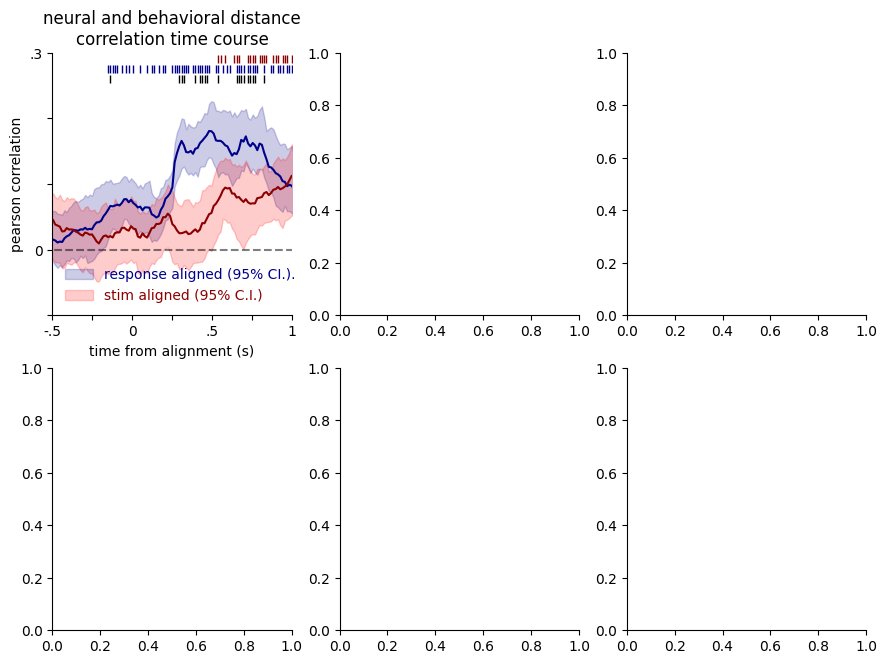

In [83]:
from matplotlib import pyplot as plt

sig_stim = (1-np.mean(all_corrs_stim>0,0))*2 <0.05
sig_resp = (1-np.mean(all_corrs_resp>0,0))*2 <0.05
sig_stim_resp = (1-np.mean(all_corrs_stim<np.mean(all_corrs_resp,0),0))*2 <0.05

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7*1.5,5*1.5))
axes = axes.flatten()

x_time = np.linspace(-1,1,len(all_corrs_stim[0]))
w=10
x_time += np.diff(x_time)[0]*w


axes[0].plot(x_time,np.nanmean(all_corrs_resp,0),color="darkblue")
axes[0].fill_between(x_time,[np.nanpercentile(a,2.5) for a in all_corrs_resp.T],[np.nanpercentile(a,97.5) for a in all_corrs_resp.T],color='darkblue',alpha=0.2,label='response aligned (95% CI.).')


axes[0].plot(x_time,np.nanmean(all_corrs_stim,0),color="darkred")
axes[0].fill_between(x_time,[np.nanpercentile(a,2.5) for a in all_corrs_stim.T],[np.nanpercentile(a,97.5) for a in all_corrs_stim.T],color='r',alpha=0.2,label='stim aligned (95% C.I.)')

axes[0].plot(x_time[sig_stim],np.ones_like(x_time[sig_stim])*0.29,'|',color='darkred')
axes[0].plot(x_time[sig_resp],np.ones_like(x_time[sig_resp])*0.275,'|',color='darkblue')
axes[0].plot(x_time[sig_stim_resp],np.ones_like(x_time[sig_stim_resp])*0.26,'|',color='k')

axes[0].plot(x_time,np.zeros_like(x_time),'--',color='k',alpha=0.5)
axes[0].set_xlabel('time from alignment (s)')
axes[0].set_ylabel('pearson correlation')
axes[0].set_title('neural and behavioral distance\ncorrelation time course')
axes[0].legend()
axes[0].set_xlim(-0.5,1)
axes[0].set_ylim(-0.1,0.3)
axes[0].set_yticks([-0.1,0,0.1,0.2,0.3],['',0,'','','.3'])
axes[0].set_xticks([-0.5,-0.25,0,0.25,0.5,0.75,1],['-.5','','0','','.5','','1'])
axes[0].legend(frameon=False)
# change font color of legend
leg = axes[0].get_legend()
ltext  = leg.get_texts()

plt.setp(ltext[1], color='darkred')
plt.setp(ltext[0], color='darkblue')
sns.despine()
#fig.tight_layout()

plt.savefig('../results/neural_behavioral_correlation_time_course.svg',dpi=300)